In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots

import sys
sys.path.append("/home/j/j_mens07/phd/NanoNets/src/")
sys.path.append("/mnt/c/Users/jonas/Desktop/phd/NanoNets/src/")
import nanonets_utils

%matplotlib inline

In [4]:
nanonets_utils.load_simulation_results(folder="../data", N=7, N_e=8)

FileNotFoundError: [Errno 2] No such file or directory: '../data/Nx=7_Ny=7_Nz=1_Ne=8.csv'

In [6]:
def standard_scale(arr):
    return (arr - np.mean(arr))/np.std(arr)

In [8]:
time_step   = 1e-10
dic         = {i : pd.read_csv(f"../data/sine_example/Nx=7_Ny=7_Nz=1_Ne=8_{i}.csv") for i in range(20)}
arr_sum     = standard_scale(dic[0].loc[:,:'E6'].sum(axis=1).values)
time        = time_step*np.arange(len(dic[0]))*1e9

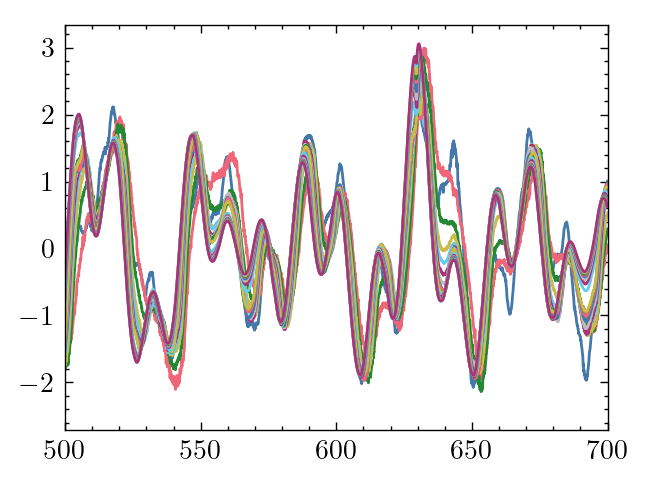

In [9]:
with plt.style.context(["science","bright"]):
    
    fig = plt.figure(dpi=200)
    ax  = fig.add_subplot()

    for key, df in dic.items():
        ax.plot(time, standard_scale(df['Current']))

    ax.set_xlim(500,700)

In [10]:
def poincare_map_zero_corssing(arr):

    vals        = standard_scale(arr)
    crossing    = np.where(np.diff(np.sign(vals)))[0]
    
    return crossing

In [11]:
sum_p   = poincare_map_zero_corssing(arr=arr_sum)
dic_p   = {i : poincare_map_zero_corssing(arr=standard_scale(dic[i]['Current'].values)) for i in dic.keys()}

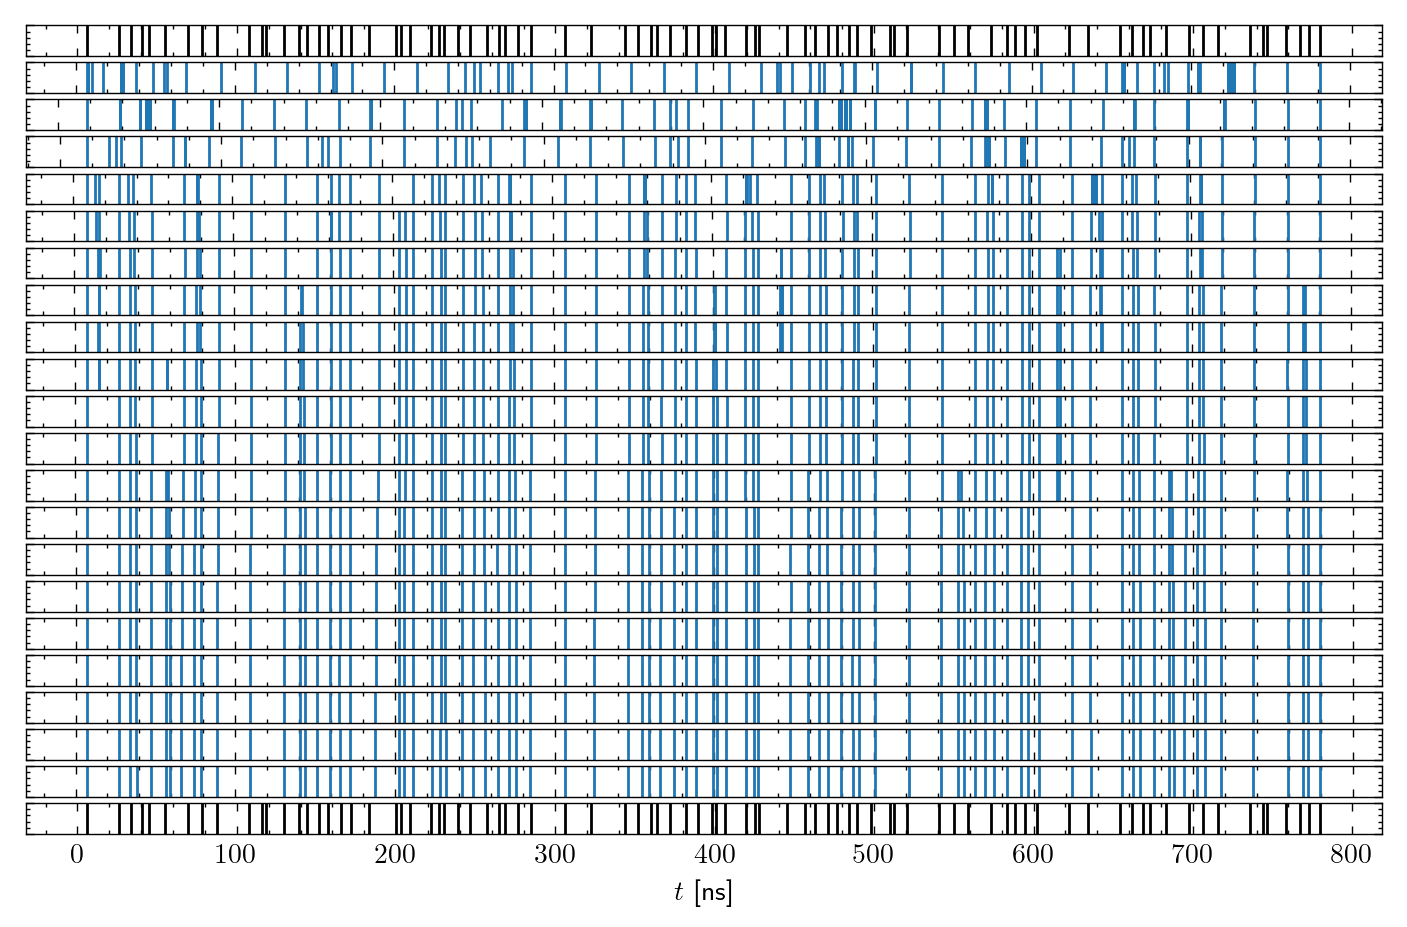

In [ ]:
with plt.style.context(["science","bright"]):
    
    fig = plt.figure(dpi=200)
    fig.set_figheight(fig.get_figheight()*2)
    fig.set_figwidth(fig.get_figwidth()*2.5)
    
    ax  = fig.add_subplot(22,1,1)
    ax.vlines(time[sum_p], ymin=0, ymax=1, colors='black')
    ax.set_ylim(0,1)
    ax.set_yticklabels("")
    ax.set_xticklabels("")

    for i, arr in dic_p.items():
        ax  = fig.add_subplot(22,1,i+2)
        ax.vlines(time[arr], ymin=0, ymax=1)
        ax.set_ylim(0,1)
        ax.set_yticklabels("")
        ax.set_xticklabels("")
    
    ax  = fig.add_subplot(22,1,22)
    ax.vlines(time[sum_p], ymin=0, ymax=1, colors='black')
    ax.set_ylim(0,1)
    ax.set_yticklabels("")
    ax.set_xlabel("$t$ [ns]")

(0.0, 0.1)

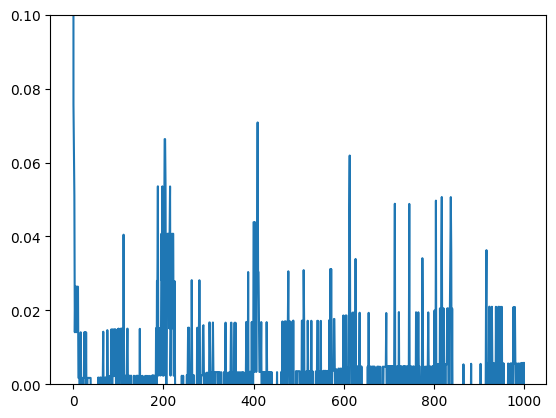

In [23]:
idx             = np.zeros(len(dic[i]['Current'].values))
idx[dic_p[0]]   = 1
auto_vals       = nanonets_utils.autocorrelation(idx, idx, 1000)

plt.plot(auto_vals)
plt.ylim(0,0.1)

In [280]:
idx

array([0., 0., 0., ..., 0., 0., 0.])

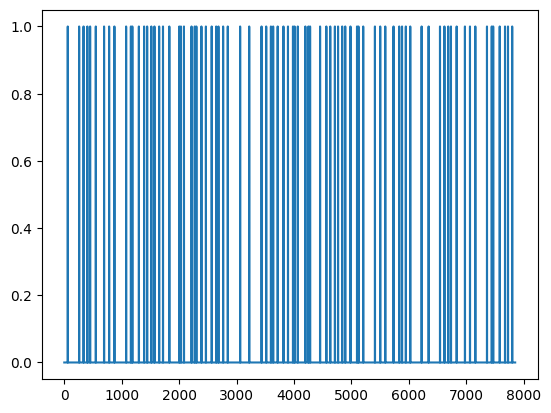

In [274]:
plt.plot(idx)

In [271]:
idx[sum_p]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

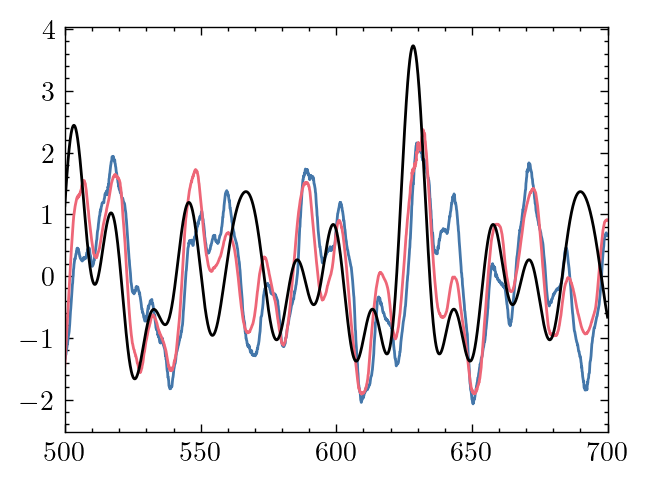

In [240]:
with plt.style.context(["science","bright"]):
    
    fig = plt.figure(dpi=200)
    ax  = fig.add_subplot()

    ax.plot(time, standard_scale(dic[0]['Current']))
    ax.plot(time, standard_scale(dic[9]['Current']))
    ax.plot(time, arr_sum, 'black')

    ax.set_xlim(500,700)

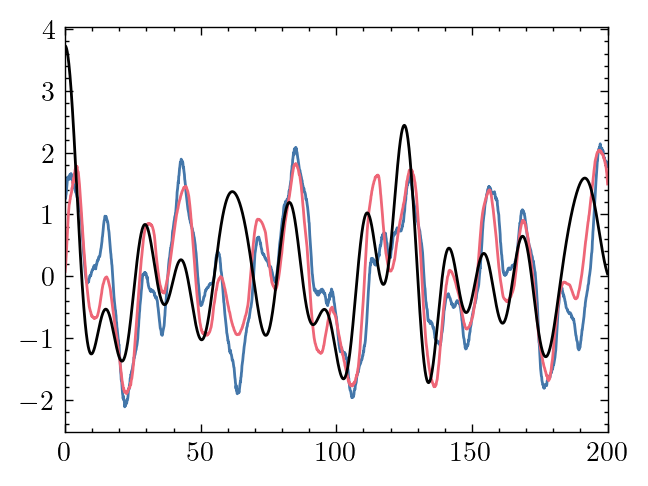

In [245]:
with plt.style.context(["science","bright"]):
    
    fig = plt.figure(dpi=200)
    ax  = fig.add_subplot()

    ax.plot(time, standard_scale(dic[0]['Current']))
    ax.plot(time, standard_scale(dic[9]['Current']))
    ax.plot(time, arr_sum, 'black')

    ax.set_xlim(0,200)

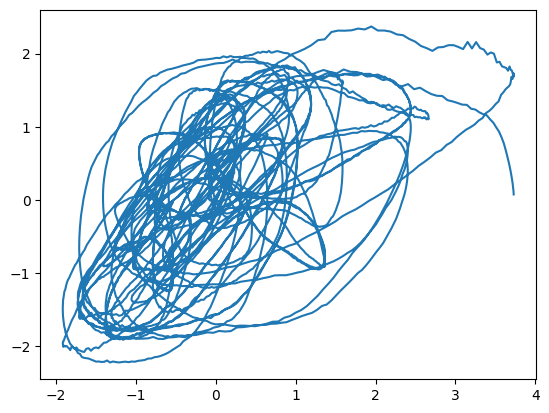

In [238]:
plt.plot(arr_sum, standard_scale(dic[9]['Current']))

In [150]:
vals        = standard_scale(df['E0'].values)
crossing    = np.where(np.diff(np.sign(vals)))[0]

<StemContainer object of 3 artists>

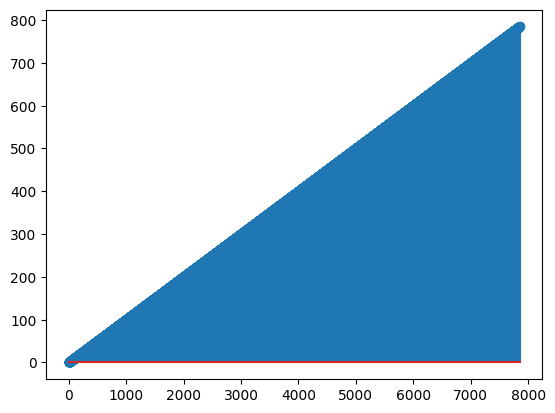

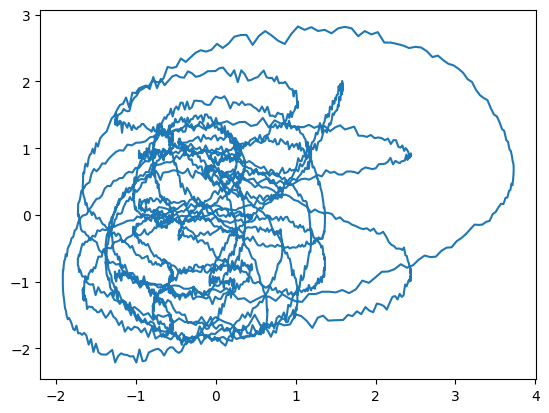

In [143]:
start = 4000
plt.plot(standard_scale(df2_sum)[start:], standard_scale(df2['Current'].values)[start:])

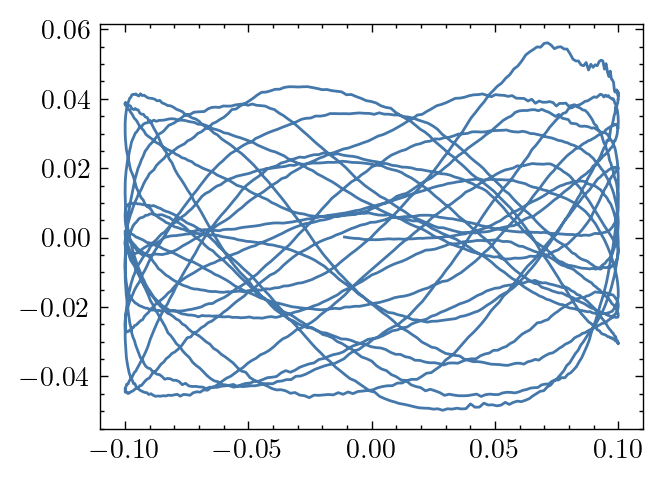

In [105]:
start = 4000
with plt.style.context(["science","bright"]):

    fig = plt.figure(dpi=200)
    ax  = fig.add_subplot()
    ax.plot(df.loc[start:,'E0'], df.loc[start:,'Current'])
    # ax.plot(df.loc[start:,'E0'], df_l.loc[start:,'Current'])

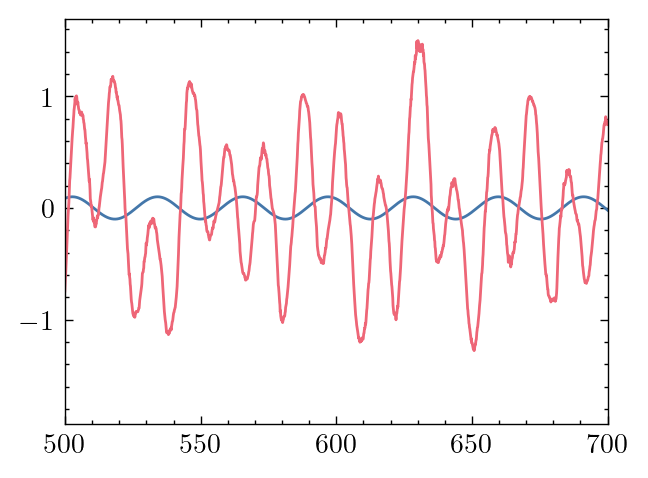

In [74]:
with plt.style.context(["science","bright"]):
    
    fig = plt.figure(dpi=200)
    ax  = fig.add_subplot()
    ax.plot(time, df['E0'])
    ax.plot(time, df_s['47'])
    ax.set_xlim(500,700)